In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label1) + [1.] * len(x_label1)

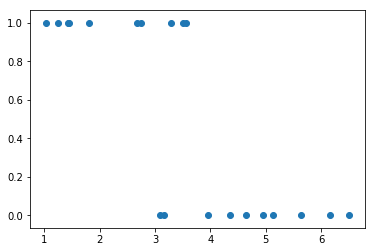

In [3]:
plt.scatter(xs, labels)
plt.show()

In [4]:
learning_rate = 0.001
training_epochs = 1000

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))

In [7]:
w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [9]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict = {X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict = {X: xs, Y: labels})
    if epoch %100 == 0:
        print(epoch, current_cost)

0 8.283125
100 3.6335635
200 2.45199
300 2.1342392
400 2.0487893
500 2.0258105
600 2.019631
700 2.0179691
800 2.0175223
900 2.0174022


In [10]:
w_val = sess.run(w)
print('learned parameters', w_val)

learned parameters [ 1.3431522  -0.23965116]


In [11]:
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
predict_val = sess.run(correct_prediction, feed_dict={X: xs, Y: labels})
accuracy_val = sess.run(accuracy, feed_dict = {X:xs, Y: labels})
print('accuracy', accuracy_val)
print('correct_prediction', predict_val)

W0801 12:59:16.594498 4684006848 deprecation.py:323] From <ipython-input-11-766abbb7d71d>:1: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


accuracy 0.85
correct_prediction [ True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False]


In [12]:
sess.close()

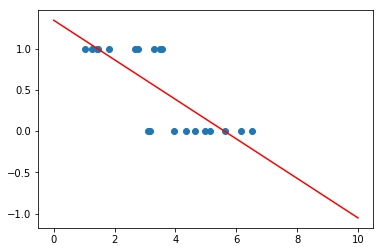

In [13]:
all_xs = np.linspace(0, 10, 100)
plt.scatter(xs, labels)
plt.plot(all_xs, all_xs * w_val[1] + w_val[0], 'r')
plt.show()